In [3]:
#  Deportista 2 "Pierna de Impulso"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\00237_right.xlsm"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo")
pierna = extraer_bloque(df, 8, 9, 10, "Pierna")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")
tobillo = extraer_bloque(df, 20, 21, 22, "Tobillo")
rodilla = extraer_bloque(df, 24, 25, 26, "Rodilla")




Preview de Pie:


,Tiempo,X,Y
4,0.000000,12.557142,-2.205101
5,33.392574,12.556012,-2.205227
6,66.785149,12.551805,-2.204670
7,100.177727,12.403560,-2.200809
8,133.570297,12.401885,-2.197865



Preview de Muslo:


,Tiempo,X,Y
4,0.000000,24.290000,6.100000
5,33.392574,24.285706,6.096943
6,66.785149,24.287279,6.098839
7,100.177727,24.285549,6.252014
8,133.570297,24.281584,6.403561



Preview de Pierna:


,Tiempo,X,Y
4,0.000000,23.100000,-0.880000
5,33.392574,23.095865,-0.880962
6,66.785149,22.989309,-0.881664
7,100.177727,22.838469,-0.878773
8,133.570297,22.871302,-0.803741



Preview de Cadera:


,Tiempo,X,Y
4,0.000000,20.518652,14.632427
5,33.392574,20.519033,14.638380
6,66.785149,20.696791,14.611380
7,100.177727,20.787844,14.714420
8,133.570297,20.835588,14.913797



Preview de Sacro:


,Tiempo,X,Y
4,0.000000,18.407473,18.132315
5,33.392574,18.406761,18.132607
6,66.785149,18.499895,18.287476
7,100.177727,18.561983,18.319305
8,133.570297,18.655941,18.471956



Preview de Tobillo:


,Tiempo,X,Y
4,0.000000,13.740000,3.360000
5,33.392574,13.740994,3.360207
6,66.785149,13.736378,3.360275
7,100.177727,13.622668,3.361610
8,133.570297,13.469512,3.363583



Preview de Rodilla:


,Tiempo,X,Y
4,0.000000,30.120000,-3.100000
5,33.392574,30.119761,-3.102997
6,66.785149,30.117792,-3.102154
7,100.177727,29.965162,-3.099800
8,133.570297,29.964796,-2.945747


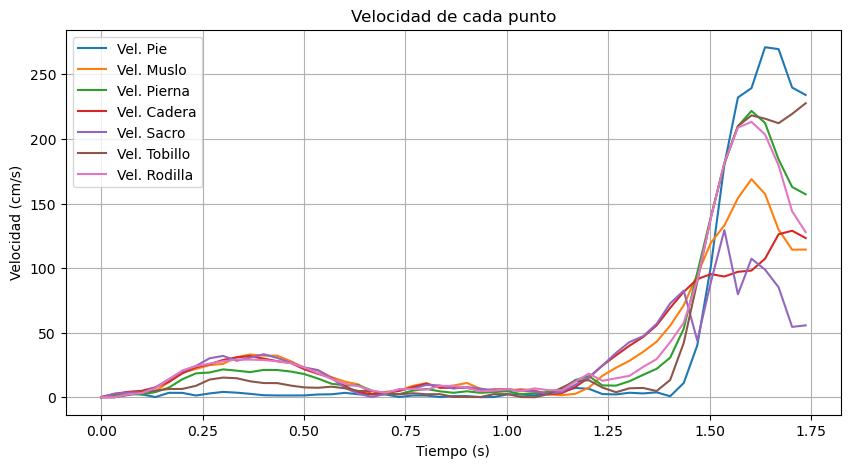

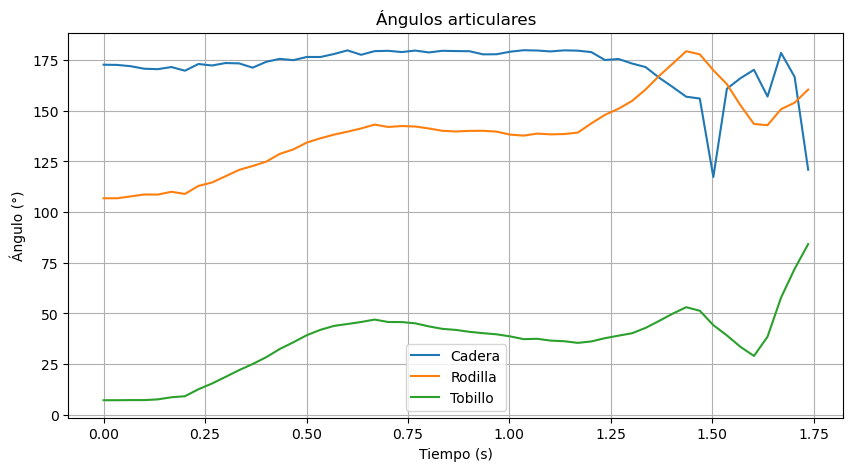


==== Pie ====
Velocidad total MAX: 271.024 cm/s
Velocidad total MIN: 0.034 cm/s
Velocidad en X MAX: 270.393 cm/s
Velocidad en X MIN: -6.568 cm/s
Velocidad en Y MAX: 79.502 cm/s
Velocidad en Y MIN: -36.949 cm/s

==== Muslo ====
Velocidad total MAX: 168.868 cm/s
Velocidad total MIN: 0.044 cm/s
Velocidad en X MAX: 166.342 cm/s
Velocidad en X MIN: -13.894 cm/s
Velocidad en Y MAX: 63.277 cm/s
Velocidad en Y MIN: -9.833 cm/s

==== Pierna ====
Velocidad total MAX: 221.697 cm/s
Velocidad total MIN: 0.127 cm/s
Velocidad en X MAX: 218.776 cm/s
Velocidad en X MIN: -16.193 cm/s
Velocidad en Y MAX: 45.022 cm/s
Velocidad en Y MIN: -4.603 cm/s

==== Cadera ====
Velocidad total MAX: 128.947 cm/s
Velocidad total MIN: 0.179 cm/s
Velocidad en X MAX: 125.253 cm/s
Velocidad en X MIN: -2.365 cm/s
Velocidad en Y MAX: 34.616 cm/s
Velocidad en Y MIN: -10.539 cm/s

==== Sacro ====
Velocidad total MAX: 129.450 cm/s
Velocidad total MIN: 0.023 cm/s
Velocidad en X MAX: 125.450 cm/s
Velocidad en X MIN: -4.506 cm/s


In [4]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pier = calcular_velocidad(pierna)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)
vel_tobi = calcular_velocidad(tobillo)
vel_rodi = calcular_velocidad(rodilla)


def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pierna[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pier[2], label="Vel. Pierna")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.plot(tiempo_seg, vel_tobi[2], label="Vel. Tobillo")
plt.plot(tiempo_seg, vel_rodi[2], label="Vel. Rodilla")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pierna", vel_pier)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)
resumen_vel("Tobillo", vel_tobi)
resumen_vel("Rodilla", vel_rodi)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)

